In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as  tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


2024-06-14 19:43:10.067211: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-14 19:43:10.128277: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-14 19:43:10.128396: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-14 19:43:10.129938: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-14 19:43:10.139784: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-14 19:43:13.233337: W tensorflow/compiler/tf2tensorrt/utils/py_utils.

# Data Loading

In [3]:
# Load the data and labels
train_data = np.load("Data/numpy/numbers/num_train_data.npy")
train_labels = np.load("Data/numpy/numbers/num_train_labels.npy")

test_data = np.load("Data/numpy/numbers/num_test_data.npy")
test_labels = np.load("Data/numpy/numbers/num_test_labels.npy")

# Reshape data for CNN
train_data = train_data.reshape(-1, 21, 3, 1)
test_data = test_data.reshape(-1, 21, 3, 1)

# Convert labels to categorical format
num_classes = len(np.unique(train_labels))

train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)

(4940, 21, 3, 1) (4940, 11) (990, 21, 3, 1) (990, 11)


In [4]:
x_train, x_val, y_train, y_val = train_test_split(
    train_data, train_labels, test_size=0.2, shuffle=True, stratify=train_labels
)

print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(3952, 21, 3, 1) (988, 21, 3, 1) (3952, 11) (988, 11)


# CNN Model: ASL Text Detection

In [4]:
# Define the CNN model
model = Sequential(
    [
        Conv2D(256, kernel_size=(2, 1), activation="relu", input_shape=(21, 3, 1)),
        MaxPool2D((2, 1)),
        
        Conv2D(512, kernel_size=(2, 1), activation="relu"),
        MaxPool2D((2, 1)),
        Dropout(0.3),
        
        Flatten(),
        Dense(256, activation="relu"),
        Dropout(0.2),
        Dense(num_classes, activation="softmax"),
    ]
)

# CNN Model: ASL Number Detection

In [5]:
# Define the CNN model
model = Sequential(
    [
        Conv2D(32, kernel_size=(2, 1), activation="relu", input_shape=(21, 3, 1)),
        MaxPool2D((2, 1)),
        
        Conv2D(64, kernel_size=(2, 1), activation="relu"),
        MaxPool2D((2, 1)),
        Dropout(0.3),
        
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.2),
        Dense(num_classes, activation="softmax"),
    ]
)

# Compilation and Training

In [6]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [7]:
# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 3, 32)         96        
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 3, 32)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 3, 64)          4160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 3, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 4, 3, 64)          0         
                                                                 
 flatten (Flatten)           (None, 768)               0

In [8]:
# Train the model
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/100
124/124 [==============================] - 3s 13ms/step - loss: 1.3542 - accuracy: 0.6361 - val_loss: 0.3077 - val_accuracy: 0.9221
Epoch 2/100
124/124 [==============================] - 1s 10ms/step - loss: 0.2263 - accuracy: 0.9390 - val_loss: 0.1685 - val_accuracy: 0.9615
Epoch 3/100
124/124 [==============================] - 2s 14ms/step - loss: 0.1509 - accuracy: 0.9565 - val_loss: 0.1214 - val_accuracy: 0.9646
Epoch 4/100
124/124 [==============================] - 2s 15ms/step - loss: 0.1143 - accuracy: 0.9676 - val_loss: 0.0971 - val_accuracy: 0.9767
Epoch 5/100
124/124 [==============================] - 3s 21ms/step - loss: 0.0945 - accuracy: 0.9732 - val_loss: 0.0831 - val_accuracy: 0.9737
Epoch 6/100
124/124 [==============================] - 2s 16ms/step - loss: 0.0916 - accuracy: 0.9760 - val_loss: 0.0735 - val_accuracy: 0.9808
Epoch 7/100
124/124 [==============================] - 1s 12ms/step - loss: 0.0749 - accuracy: 0.9775 - val_loss: 0.0698 - val_accuracy:

In [9]:
# Evaluate the model
score = model.evaluate(test_data, test_labels, verbose=0)
print(f'Test accuracy: {score[1] * 100:.2f}%')
print(f'Test accuracy: {score}')

Test accuracy: 99.49%
Test accuracy: [0.01906903088092804, 0.9949495196342468]


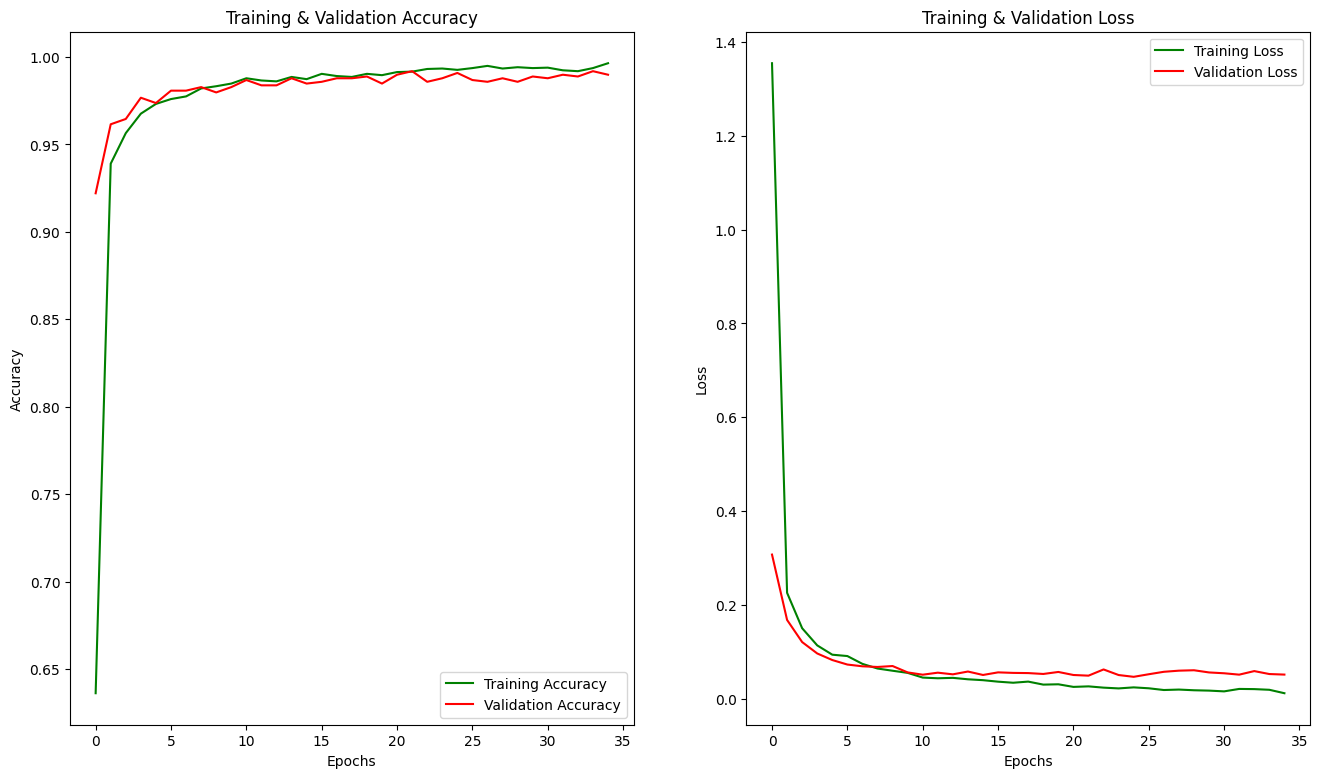

In [11]:
import matplotlib.pyplot as plt

epochs = [i for i in range(35)]
fig,ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)


ax[0].plot(epochs, train_acc, 'g', label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()


ax[1].plot(epochs, train_loss, 'g', label='Training Loss')
ax[1].plot(epochs, val_loss, 'r', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()

In [13]:
# Save the model
model.save('models/asl_number_model.h5')